## Practise - 26/09/2020

* Regression data set 
* Classification data set 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
# get the regression data 

car_sales = pd.read_csv("9.1 car-sales-extended-missing-data1.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [3]:
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [4]:
car_sales.dropna(subset=["Price"],inplace=True)
len(car_sales)

950

In [5]:
# split the data first into features and labels 

X = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

# remove missing values with help of impute method 

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
num_imputer = SimpleImputer(strategy="mean")
doors_imputer = SimpleImputer(strategy="constant",fill_value=4.0)

cat_features = ["Make","Colour"]
num_features = ["Odometer (KM)"]
doors_features = ["Doors"]

transformer = ColumnTransformer([("cat_imputer",cat_imputer,cat_features),
                                 ("num_imputer",num_imputer,num_features),
                                 ("doors_imputer",doors_imputer,doors_features)])

transformed_X = transformer.fit_transform(X)
transformed_X

array([['Honda', 'White', 35431.0, 4.0],
       ['BMW', 'Blue', 192714.0, 5.0],
       ['Honda', 'White', 84714.0, 4.0],
       ...,
       ['Nissan', 'Blue', 66604.0, 4.0],
       ['Honda', 'White', 215883.0, 4.0],
       ['Toyota', 'Blue', 248360.0, 4.0]], dtype=object)

In [6]:
car_sales_filled = pd.DataFrame(transformed_X, columns=["Make","Colour","Odometer (KM)","Doors"])
car_sales_filled

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
945,Toyota,Black,35820,4
946,missing,White,155144,3
947,Nissan,Blue,66604,4
948,Honda,White,215883,4


In [7]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [8]:
# After filling missing values check the data types 

car_sales_filled.dtypes

Make             object
Colour           object
Odometer (KM)    object
Doors            object
dtype: object

In [9]:
# convert entire column  to numeric 

car_sales_filled["Odometer (KM)"] = car_sales_filled["Odometer (KM)"].astype('int')
car_sales_filled["Doors"] = car_sales_filled.Doors.astype('int')
car_sales_filled.dtypes

Make             object
Colour           object
Odometer (KM)     int32
Doors             int32
dtype: object

In [10]:
# convert make and colour to numeric with help of One hot encoder 

from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Make','Colour']
one_hot = OneHotEncoder()

transformer1 = ColumnTransformer([("One_Hot",one_hot,categorical_features)],remainder="passthrough")
X_transformed = transformer1.fit_transform(car_sales_filled)
X_transformed

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 4.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.92714e+05, 5.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 4.00000e+00],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 4.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 4.00000e+00]])

In [11]:
car_sales_numeric = pd.DataFrame(X_transformed)
car_sales_numeric

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35431.0,4.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,192714.0,5.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,84714.0,4.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,154365.0,4.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,181577.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35820.0,4.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,155144.0,3.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,66604.0,4.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,215883.0,4.0


In [12]:
car_sales_numeric.dtypes
#car_sales_numeric.isna().sum()

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
dtype: object

In [13]:
# get the data create model 

X = car_sales_numeric 
y 

# choose a model 

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# split into train and test set 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# fit the model 

model.fit(X_train,y_train)

# predict the model 

y_preds = model.predict(X_test)

# evaluate the scoring by using `score` method 

norm_score = model.score(X_test,y_test)
norm_score



0.3464010121258117

In [14]:
# create an evaluation metrics 

from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_preds(y_true,y_preds):
    mse = mean_absolute_error(y_true,y_preds)
    msf = mean_squared_error(y_true,y_preds)
    
    metric_dict = {"mean_absolute_error":mse,
                   "mean_squared_error":msf}
    
    print(f"mean-absolute-error:{mse}")
    print(f"mean-squared-error:{msf}")
    
    return metric_dict

baseline_reg_metrics = evaluate_preds(y_test,y_preds)

mean-absolute-error:5652.062667117094
mean-squared-error:49709560.62023896


In [15]:
# get load_boston dataset 

from sklearn.datasets import load_boston
boston = load_boston()
boston


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [16]:
boston_df = pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"] = boston["target"]
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [17]:
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [18]:
# split the data into X features and y labels 

X = boston_df.drop("target",axis=1)
y = boston_df["target"]

# split the data into train valid and test set 

train_split = round(0.7 * len(boston_df))
valid_split = train_split + round(0.15 * len(boston_df))

# split into train valid and test set 

X_train,y_train = X[:train_split],y[:train_split]
X_valid,y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test = X[valid_split:], y[:valid_split]

# fit the model 

model.fit(X_train,y_train)

# predict the valid score 

y_preds = model.predict(X_valid)

# evaluate using method created above

baseline_metrics = evaluate_preds(y_valid,y_preds)

mean-absolute-error:6.631513157894735
mean-squared-error:85.81188567105261


In [19]:
len(X_train), len(y_train
                 )
len(X_valid), len(y_valid)

(76, 76)

In [20]:
train_split

354

In [21]:
valid_split

430

In [22]:
df = pd.DataFrame({"Actual-model":y_valid, "predicted-model":y_preds})
df["differences"] = df["Actual-model"]-df["predicted-model"]
df

,Actual-model,predicted-model,differences
354,18.2,20.257,-2.057
355,20.6,21.482,-0.882
356,17.8,16.445,1.355
357,21.7,19.189,2.511
358,22.7,20.231,2.469
...,...,...,...
425,8.3,14.564,-6.264
426,10.2,18.868,-8.668
427,10.9,18.137,-7.237
428,11.0,15.316,-4.316


## Classification data 



In [23]:
heart_disease = pd.read_csv("13.1 heart-disease.csv")
heart_disease

heart_disease.dtypes

heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
np.random.seed(110)

# split the data into X features and y labels 

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# choose a model 

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# split the data into X features and y labels 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# fit the model 

clf.fit(X_train,y_train)

# predict the model 

y_preds = clf.predict(X_test)

# predict the probabilities 

y_preds_proba = clf.predict_proba(X_test)

# select positive values from the probabilities 

y_preds_positive = y_preds_proba[:,1]

# evaluate using score method 

norm_score = clf.score(X_test,y_test)
norm_score

0.8524590163934426

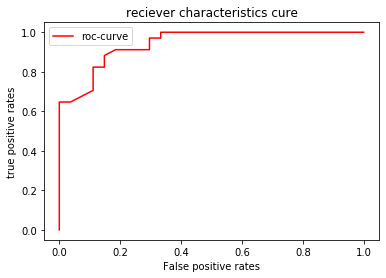

In [25]:
# plot roc-curve 

from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,y_preds_positive)
fpr[:10]

def roc_curve(fpr,tpr):
    """
    Plot roc curve given false-positive-rates and true-positive-rates
    """
    plt.plot(fpr,tpr,color="red" , label ="roc-curve")
    plt.xlabel("False positive rates")
    plt.ylabel("true positive rates")
    plt.title("reciever characteristics cure")
    plt.legend()
    plt.show()
    
roc_curve(fpr,tpr)

In [26]:
np.random.seed(429)
# check how much area is covered under the curve

from sklearn.metrics import average_precision_score
auc_score = average_precision_score(y_test,y_preds_positive)
auc_score
print(f"The are under curve is :{auc_score*100:.2f}%")

The are under curve is :95.36%


In [27]:
# confusion matrix 

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_preds)
conf_mat
pd.crosstab(y_test,y_preds, rownames=["actual-model"],colnames=["Predicted-model"])

Predicted-model,0,1
actual-model,,
0,21,6
1,3,31


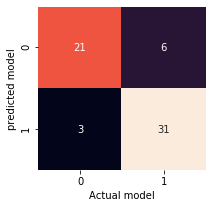

In [31]:
# plot using seaborn's heatmap 

import seaborn as sns

fig,ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(conf_mat,
                 annot=True,
                 cbar=False)
plt.xlabel("Actual model")
plt.ylabel("predicted model");

In [35]:
# classification-report 

from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [41]:
# evalaute by creating a method 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def evaluate_preds(y_true,y_preds):
    """
    Comparison with true labels and predict labels 
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    
    metric_dict = {"accuracy":round(accuracy,2),
                   "precision":round(precision,2),
                   "recall":round(recall,2),
                   "f1":round(f1,2)}
    
    print(f"Accuracy:{accuracy*100:.2f}%")
    print(f"Precision:{precision*100:.2f}%")
    print(f"recall:{recall*100:.2f}%")
    print(f"f1:{f1*100:.2f}%")
    
# evaluate the score 

baseline_clf_metrics = evaluate_preds(y_test,y_preds)

Accuracy:85.25%
Precision:83.78%
recall:91.18%
f1:87.32%


In [65]:
# create train valid and test set 

train_split = round(0.7*len(heart_disease))
valid_split = train_split + round(0.15*len(heart_disease))

# split into train valid set and test 

X_train,y_train = X[:train_split], y[:train_split]
X_valid,y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:],y[:valid_split]

# fit the model 

clf.fit(X_train,y_train)

# predict the valid model 

y_preds = clf.predict(X_valid)

# evaluate 

valid_score = evaluate_preds(y_valid,y_preds)

Accuracy:66.67%
Precision:0.00%
recall:0.00%
f1:0.00%


F:\Softwares\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
(train_split), valid_split

(212, 257)

In [58]:
len(heart_disease)

303

In [59]:
len(X_train),len(y_train),len(X_valid),len(y_valid),len(X_test),len(y_test)

(212, 212, 45, 45, 46, 46)

### Tuning Hyperparameter By Hand 


In [84]:
# get data 
X,y

# split into train and test set 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# tune hyper parameter 

clf_hand = RandomForestClassifier(n_estimators=100)

# fit the model 

clf_hand.fit(X_train,y_train)

# predict the model 

y_preds_hand = clf_hand.predict(X_test)

# evaluate using method 

evaluate_preds(y_test,y_preds_hand)

# evaluate the score 

#clf_hand.score(X_test,y_test)

Accuracy:83.61%
Precision:83.33%
recall:88.24%
f1:85.71%


## Tuning hyperparameter using RandomizedSearchCV 

In [81]:
# make a dictionary of parameters 

grid = {"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,5,10,20,30],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(2,20,2)}

# instantiate RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

rs_clf = RandomizedSearchCV(clf,
                            param_distributions=grid,
                            n_iter = 20,
                            cv=5,
                            verbose=True
                           )
rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [87]:
np.random.seed(15)
# predict the model 

y_rs_preds = rs_clf.predict(X_test)

# evaluate using method 

evaluate_preds(y_test,y_rs_preds)

Accuracy:93.44%
Precision:94.12%
recall:94.12%
f1:94.12%


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [6]:
heart_disease = pd.read_csv("13.1 heart-disease.csv")
hear_disease_shuffled = heart_disease.sample(frac=1)
hear_disease_shuffled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3,0
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1,1
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2,1
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2,1
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0


In [13]:
## split into features and label s

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

## split into training n test set 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# chhoose a model 

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
model.score(X_test,y_test)

0.8360655737704918

In [19]:
## getting train valid and test set 

train_split = round(0.7 * len(heart_disease))
valid_split = round(train_split + 0.15 * len(heart_disease))

In [20]:
train_split,valid_split

(212, 257)

In [27]:
## getting train valid and test set 

X_train,y_train = X[:train_split],y[:train_split]
X_valid,y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test = X[valid_split:],y[valid_split:]

len(X_train),len(y_train),len(X_valid),len(y_valid),len(X_test),len(y_test)

(212, 212, 45, 45, 46, 46)

In [45]:
## use three different models 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 

models = {"logistic-regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random-forest":RandomForestClassifier()}

def scores(models,X_train,y_train,X_test,y_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
        print(name,f":{model_score[name]*100:.2f}%")
        
    return model_score

scores(models,X_train,y_train,X_test,y_test)

logistic-regression :45.65%
KNN :13.04%
Random-forest :47.83%


F:\Softwares\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'logistic-regression': 0.45652173913043476,
 'KNN': 0.13043478260869565,
 'Random-forest': 0.4782608695652174}

In [50]:
## tuning KNN neigbors 

train_scores = []
test_scores = []

neighbors = np.arange(1,21,1)
knn = KNeighborsClassifier()

for i in neighbors:
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    

In [51]:
train_scores

[0.8207547169811321,
 0.8207547169811321,
 0.8207547169811321,
 0.8207547169811321,
 0.8207547169811321,
 0.8207547169811321,
 0.8207547169811321,
 0.8207547169811321,
 0.8207547169811321,
 0.8207547169811321,
 0.8207547169811321,
 0.8207547169811321,
 0.8207547169811321,
 0.8207547169811321,
 0.8207547169811321,
 0.8207547169811321,
 0.8207547169811321,
 0.8207547169811321,
 0.8207547169811321,
 0.8207547169811321]

In [52]:
test_scores

[0.13043478260869565,
 0.13043478260869565,
 0.13043478260869565,
 0.13043478260869565,
 0.13043478260869565,
 0.13043478260869565,
 0.13043478260869565,
 0.13043478260869565,
 0.13043478260869565,
 0.13043478260869565,
 0.13043478260869565,
 0.13043478260869565,
 0.13043478260869565,
 0.13043478260869565,
 0.13043478260869565,
 0.13043478260869565,
 0.13043478260869565,
 0.13043478260869565,
 0.13043478260869565,
 0.13043478260869565]

## Practise-1/12/2020

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# get the data 
heart_disease = pd.read_csv("13.1 heart-disease.csv")


In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
## check for missing values 

heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [15]:
## split into X features and y labels 

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

## split into training and test set 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# choose a model/estimators

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# fit the model 

clf.fit(X_train,y_train)

# make predictions 

y_preds = clf.predict(X_test)

# predict the probabilities 

y_preds_proba = clf.predict_proba(X_test)
y_preds_proba[:10],y_preds[:10]



(array([[0.17, 0.83],
        [0.47, 0.53],
        [0.15, 0.85],
        [0.06, 0.94],
        [0.94, 0.06],
        [0.17, 0.83],
        [0.95, 0.05],
        [0.47, 0.53],
        [0.83, 0.17],
        [0.88, 0.12]]),
 array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64))

In [17]:
# select positive values 

preds_positive = y_preds_proba[:,1]
preds_positive[:10]

array([0.83, 0.53, 0.85, 0.94, 0.06, 0.83, 0.05, 0.53, 0.17, 0.12])

In [20]:
## plot an roc curve 

from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,preds_positive)
fpr[:10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03703704, 0.03703704, 0.03703704, 0.11111111])

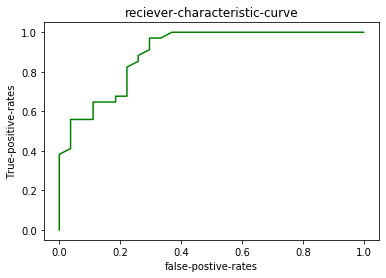

In [23]:
# plot the curve 

def roc_curve(fpr,tpr):
    """
    comparison with false positive rates and true positive 
    """
    plt.plot(fpr,tpr,color="green",label="roc")
    plt.xlabel("false-postive-rates")
    plt.ylabel("True-positive-rates")
    plt.title("reciever-characteristic-curve")
    
roc_curve(fpr,tpr)

In [27]:
## check how much area is covered under the curve 

from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test,preds_positive)
print(f"The percentage of area covered under the curve is:{auc_score*100:.2f}%")

The percentage of area covered under the curve is:89.54%


In [30]:
## plot a confusion matrix 

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_preds)
conf_mat



array([[20,  7],
       [ 5, 29]], dtype=int64)

In [31]:
pd.crosstab(y_test,y_preds,rownames=["Actual-label"],colnames=["Predicted-label"])

Predicted-label,0,1
Actual-label,,
0,20,7
1,5,29


Text(33.0, 0.5, 'Predicted-label')

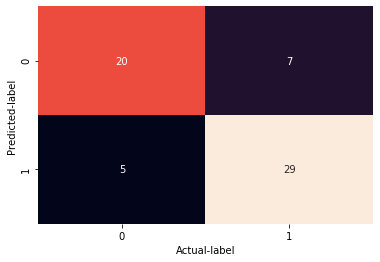

In [35]:
# plot the confusion matrix using seaborn's heat map 

import seaborn as sns
fig,ax = plt.subplots()
ax = sns.heatmap(conf_mat,
                 annot=True,
                 cbar=False)
plt.xlabel("Actual-label")
plt.ylabel("Predicted-label")

In [52]:
## evaluate a score 

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

def show_scores(y_true,y_preds):
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    
    print(f"accuracy is:{accuracy*100:.2f}%")
    print(f"Precision is:{precision*100:.2f}%")
    print(f"recall is:{recall*100:.2f}%")
    print(f"f1 is:{f1*100:.2f}%")
    

In [53]:
show_scores(y_test,y_preds)

accuracy is:80.33%
Precision is:80.56%
recall is:85.29%
f1 is:82.86%


In [61]:
## cross validation scores 

from sklearn.model_selection import cross_val_score

cross_val_score = cross_val_score(clf,X,y,scoring="accuracy")
np.mean(cross_val_score)

0.8116939890710382

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## chooose different models 

models = {"Logistic-regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random-forest":RandomForestClassifier()}

def fit_and_score(model,X_train,X_test,y_train,y_test):
    for name,model in models.items():
        model_scores = {}
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
        print(name,f":{model_scores[name]*100:.2f}%")
        
fit_and_score(model,X_train,X_test,y_train,y_test)

F:\Softwares\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic-regression :81.97%
KNN :70.49%
Random-forest :80.33%


## Regression data set 



In [82]:
# get the data 

car_sales = pd.read_csv("9.1 car-sales-extended-missing-data1.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [83]:
## chheck for missing values 

car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [87]:
car_sales.dropna(subset=["Price"],inplace=True)

In [88]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [89]:
car_sales.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [97]:
## fill the missing values with impute method 

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer = SimpleImputer(strategy="constant",fill_value=["Honda","Red"])
num_imputer = SimpleImputer(strategy="mean")
doors_imputer = SimpleImputer(strategy="constant",fill_value=4.0)

cat_features = ["Make","Colour"]
num_features = ["Odometer (KM)"]
doors_features = ["Doors"]

transformer = ColumnTransformer([("cat_imputer",cat_imputer,cat_features),
                                 ("num_imputer",num_imputer,num_features),
                                 ("doors_imputer",doors_imputer,doors_features)])

X_transformed = transformer.fit_transform(car_sales)

X_transformed

array([['Honda', 'White', 35431.0, 4.0],
       ['BMW', 'Blue', 192714.0, 5.0],
       ['Honda', 'White', 84714.0, 4.0],
       ...,
       ['Nissan', 'Blue', 66604.0, 4.0],
       ['Honda', 'White', 215883.0, 4.0],
       ['Toyota', 'Blue', 248360.0, 4.0]], dtype=object)

In [99]:
car_sales_filled = pd.DataFrame(X_transformed,columns=["Make","Colour","Odometer (Km)","Doors"])

In [100]:
car_sales_filled

,Make,Colour,Odometer (Km),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
945,Toyota,Black,35820,4
946,Honda,White,155144,3
947,Nissan,Blue,66604,4
948,Honda,White,215883,4


In [101]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Odometer (Km)    0
Doors            0
dtype: int64

In [102]:
car_sales_filled.dtypes

Make             object
Colour           object
Odometer (Km)    object
Doors            object
dtype: object

In [104]:
pd.api.types.is_string_dtype(car_sales_filled["Colour"])

True

In [112]:
## convert object datatype to numeric with the help of onehoteencoder 

from sklearn.preprocessing import OneHotEncoder

categorical_features = ["Make","Colour"]
one_hot = OneHotEncoder()

transformer1 = ColumnTransformer([("One-hot",one_hot,categorical_features)])
transformed_X = transformer1.fit_transform(car_sales_filled)
transformed_X

<950x9 sparse matrix of type '<class 'numpy.float64'>'
	with 1900 stored elements in Compressed Sparse Row format>

In [114]:
df = pd.DataFrame(transformed_X)
df

,0
0,"(0, 1)\t1.0\n (0, 8)\t1.0"
1,"(0, 0)\t1.0\n (0, 5)\t1.0"
2,"(0, 1)\t1.0\n (0, 8)\t1.0"
3,"(0, 3)\t1.0\n (0, 8)\t1.0"
4,"(0, 2)\t1.0\n (0, 5)\t1.0"
...,...
945,"(0, 3)\t1.0\n (0, 4)\t1.0"
946,"(0, 1)\t1.0\n (0, 8)\t1.0"
947,"(0, 2)\t1.0\n (0, 5)\t1.0"
948,"(0, 1)\t1.0\n (0, 8)\t1.0"


In [124]:
## split into X features and y labels 

X = df
y = car_sales["Price"]

len(y),len(X)

## split into train and test set 

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2)

# chhooose a model/estimator 

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# fit the model 
model.fit(X_train,y_train)

# evaluate the score 

model.score(X_test,y_test) 

0.1736554303911437

In [128]:
# make predictions 

y_preds = model.predict(X_test)
y_preds[:10],y_test

(array([15512.21476437, 14407.78295401, 16388.18862919, 13685.42987154,
        13685.42987154, 14173.38406232, 14173.38406232, 14173.38406232,
        14173.38406232, 16388.18862919]),
 393    10834.0
 595    30374.0
 397    12745.0
 729    12950.0
 236    27787.0
         ...   
 331    24834.0
 143    31536.0
 268    28414.0
 566    29145.0
 894     6676.0
 Name: Price, Length: 190, dtype: float64)

In [138]:
## evaluate score 

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

def score(y_true,y_preds):
    r2 = r2_score(y_true,y_preds)
    mse = mean_absolute_error(y_true,y_preds)
    msqe = mean_squared_error(y_true,y_preds)
    
    print(f"r2-score is:{r2*100:.2f}%")
    print(f"mse:{mse:.2f}")
    print(f"msqe:{msqe:.2f}")
    
score(y_test,y_preds)

r2-score is:17.37%
mse:6195.61
msqe:59528203.42


In [142]:
## load-boston-dataset 
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [145]:
boston_df = pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"] = boston["target"]

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [146]:
## check for missing values 

boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [147]:
## check datatypes 

boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [170]:
## split into features and label 

X = boston_df.drop("target",axis=1)
y = boston_df["target"]

## split into train valid and test set 
train_set = round(0.7 * len(boston_df))
valid_set = round(train_set + 0.15*len(boston_df))
test_set = round(valid_set + 0.15*len(boston_df))
                  
train_set,valid_set,test_set

X_train,y_train = X[:train_set],y[:train_set]
X_valid,y_valid = X[train_set:valid_set],y[train_set:valid_set]
X_test,y_test = X[valid_set:test_set],y[valid_set:test_set]

## fit the model and make predictions and evaluate the score 

model.fit(X_train,y_train)

## make predictions on valid set 

y_valid_preds = model.predict(X_valid)

# evaluate score with function created above 

score(y_valid,y_valid_preds)


r2-score is:21.43%
mse:6.72
msqe:87.74


## Practise - 24/1/21

## Classification problem

## End-End heart disease

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

heart_disease = pd.read_csv("13.1 heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
## check for missing values 

heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
## check the datatypes 

heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
## let's shuffle the data set 

heart_disease_shuffle = heart_disease.sample(frac=1)
heart_disease_shuffle

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2,0
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0


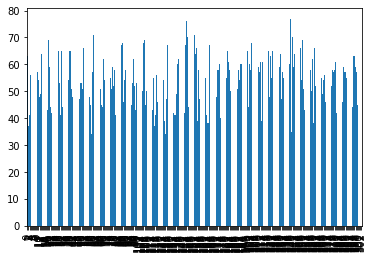

In [9]:
## let's visualize the data 

heart_disease["age"].plot.bar()

In [20]:
## split into features and labels 
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

## let's split into training and test set 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
len(X_train),len(y_train),len(X_test),len(y_test)

(242, 242, 61, 61)

In [23]:
## choose a model 

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

## fit the model 

clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
## evaluate a score 

clf.score(X_test,y_test)

0.7377049180327869

In [25]:
clf.score(X_train,y_train)

1.0

In [26]:
y_preds = clf.predict(X_test)

In [27]:
y_preds

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [29]:
y_preds_proba = clf.predict_proba(X_test)
y_preds_proba

array([[0.71, 0.29],
       [0.52, 0.48],
       [0.58, 0.42],
       [0.97, 0.03],
       [0.53, 0.47],
       [0.06, 0.94],
       [0.54, 0.46],
       [0.95, 0.05],
       [0.95, 0.05],
       [0.42, 0.58],
       [0.93, 0.07],
       [0.23, 0.77],
       [0.94, 0.06],
       [0.78, 0.22],
       [0.11, 0.89],
       [0.37, 0.63],
       [0.81, 0.19],
       [0.62, 0.38],
       [0.49, 0.51],
       [0.9 , 0.1 ],
       [0.94, 0.06],
       [0.26, 0.74],
       [0.05, 0.95],
       [0.15, 0.85],
       [0.27, 0.73],
       [0.09, 0.91],
       [0.66, 0.34],
       [0.32, 0.68],
       [0.5 , 0.5 ],
       [0.69, 0.31],
       [0.54, 0.46],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.84, 0.16],
       [0.82, 0.18],
       [0.27, 0.73],
       [0.85, 0.15],
       [0.42, 0.58],
       [0.17, 0.83],
       [0.65, 0.35],
       [0.26, 0.74],
       [0.35, 0.65],
       [0.05, 0.95],
       [0.46, 0.54],
       [0.66, 0.34],
       [0.48, 0.52],
       [0.53, 0.47],
       [0.63,

In [30]:
preds_positive = y_preds_proba[:,1]

In [31]:
preds_positive

array([0.29, 0.48, 0.42, 0.03, 0.47, 0.94, 0.46, 0.05, 0.05, 0.58, 0.07,
       0.77, 0.06, 0.22, 0.89, 0.63, 0.19, 0.38, 0.51, 0.1 , 0.06, 0.74,
       0.95, 0.85, 0.73, 0.91, 0.34, 0.68, 0.5 , 0.31, 0.46, 0.99, 0.  ,
       0.16, 0.18, 0.73, 0.15, 0.58, 0.83, 0.35, 0.74, 0.65, 0.95, 0.54,
       0.34, 0.52, 0.47, 0.37, 0.48, 0.72, 0.41, 0.35, 0.45, 0.8 , 0.97,
       0.88, 0.74, 0.73, 0.82, 0.54, 1.  ])

In [33]:
## plot an roc curve 

from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,preds_positive)

In [34]:
fpr,tpr

(array([0.  , 0.  , 0.  , 0.04, 0.04, 0.04, 0.08, 0.08, 0.08, 0.12, 0.12,
        0.16, 0.16, 0.2 , 0.2 , 0.28, 0.28, 0.32, 0.32, 0.36, 0.36, 0.44,
        0.52, 0.52, 0.76, 0.92, 1.  ]),
 array([0.        , 0.02777778, 0.05555556, 0.05555556, 0.11111111,
        0.36111111, 0.41666667, 0.5       , 0.52777778, 0.52777778,
        0.55555556, 0.55555556, 0.66666667, 0.66666667, 0.72222222,
        0.72222222, 0.77777778, 0.80555556, 0.91666667, 0.91666667,
        0.97222222, 0.97222222, 0.97222222, 1.        , 1.        ,
        1.        , 1.        ]))

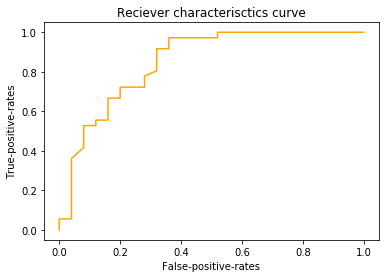

In [36]:
## plot an roc curve 

def roc_curve(fpr,tpr):
    """
    plot curve between false positive rates and true positive rates 
    
    """
    plt.plot(fpr,tpr,color="orange",label = "roc")
    plt.xlabel("False-positive-rates")
    plt.ylabel("True-positive-rates")
    plt.title("Reciever characterisctics curve")
    
roc_curve(fpr,tpr)

In [44]:
## plot confusion metrics 

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_preds)
conf_mat

array([[20,  5],
       [11, 25]], dtype=int64)

In [46]:
pd.crosstab(y_test,y_preds, rownames=["Actual_labels"],colnames=["Predicted labels"])

Predicted labels,0,1
Actual_labels,,
0,20,5
1,11,25


Text(33.0, 0.5, 'Predicted-label')

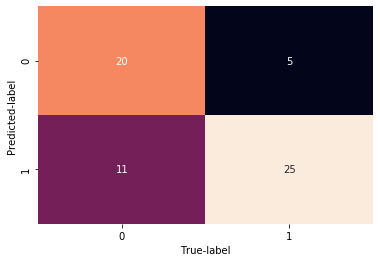

In [51]:
## plot using seaborn heat map 

import seaborn as sns

fig,ax = plt.subplots()
ax = sns.heatmap(conf_mat,
                 annot=True,
                 cbar=False)
plt.xlabel("True-label")
plt.ylabel("Predicted-label")

In [60]:
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(clf,X,y,cv=7)
cross_val_score

array([0.79545455, 0.84090909, 0.90697674, 0.8372093 , 0.8372093 ,
       0.81395349, 0.76744186])

In [61]:
np.mean(cross_val_score)

0.8284506191482934

In [65]:
print(f"The cross val score is:{np.mean(cross_val_score)*100:.2f}%")

The cross val score is:82.85%


In [72]:
from sklearn.metrics import accuracy_score
#cross_val_score(clf,X,y,scoring="accuracy_score")

TypeError: 'numpy.ndarray' object is not callable

In [75]:
accuracy = accuracy_score(y_test,y_preds)
accuracy

0.7377049180327869

In [88]:
## scoring parameters 

from sklearn.metrics import precision_score,recall_score,f1_score

def evaluate_score(y_true,y_preds):
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    
    metric_dict = {"accuracy":round(accuracy,2),
                   "precision":round(precision,2),
                   "recall":round(recall,2),
                   "f1":round(f1,2)}
    
    #
    print(f"accuracy score is:{accuracy*100:.2f}%")
    print(f"precision_score is:{precision*100:.2f}%")
    print(f"recall_score is:{recall*100:.2f}%")
    print(f"f1_score is:{f1*100:.2f}%")
    return metric_dict
        
    


evaluate_score(y_test,y_preds)

accuracy score is:73.77%
precision_score is:83.33%
recall_score is:69.44%
f1_score is:75.76%


{'accuracy': 0.74, 'precision': 0.83, 'recall': 0.69, 'f1': 0.76}

In [110]:
### working with different estimators 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

model = {"Logistic_Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
          "Random_forest":RandomForestClassifier()}

## fit and evaluate score 

def fit_and_score(model,X_train,X_test,y_train,y_test):
    # model.fit(X_train,y_train)
    model_score = {}
    for name,model in model.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
        print(name,f":{model_score[name]*100:.2f}")
    return model_score

fit_and_score(model,X_train,X_test,y_train,y_test)
        

F:\Softwares\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic_Regression :86.89
KNN :60.66
Random_forest :73.77


{'Logistic_Regression': 0.8688524590163934,
 'KNN': 0.6065573770491803,
 'Random_forest': 0.7377049180327869}

In [114]:
## tuning hyperparameters by hand 

clf = RandomForestClassifier(n_estimators=100)

## fit the model 

clf.fit(X_train,y_train)

## evaluate the score 

clf.score(X_test,y_test)

0.7377049180327869

In [121]:
## tuning hyperparameters using RandomizedSearchCV

grid = {"n_estimators":np.arange(10,100,10),
        "min_samples_leaf":np.arange(2,10,2),
        "max_depth":[2,5,10],
        "min_samples_split":np.arange(2,10,2),
        "max_features":["auto","sqrt"]}

from sklearn.model_selection import RandomizedSearchCV

rs_clf = RandomizedSearchCV(clf,param_distributions=grid,cv=5,verbose=2,n_iter=10)

## fit the tuned model 

rs_clf.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=2, total=   0.1s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=2 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=2, total=   0.1s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=2 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=2, total=   0.1s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=2 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=2, total=   0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s



[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=2 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=2, total=   0.0s
[CV] n_estimators=80, min_samples_split=8, min_samples_leaf=6, max_features=auto, max_depth=5 
[CV]  n_estimators=80, min_samples_split=8, min_samples_leaf=6, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=80, min_samples_split=8, min_samples_leaf=6, max_features=auto, max_depth=5 
[CV]  n_estimators=80, min_samples_split=8, min_samples_leaf=6, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=80, min_samples_split=8, min_samples_leaf=6, max_features=auto, max_depth=5 
[CV]  n_estimators=80, min_samples_split=8, min_samples_leaf=6, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=80, min_samples_split=8, min_samples_leaf=6, max_features=auto, max_depth=5 
[CV]  n_estimators=80, min_samples_split=8, min_samples_leaf=6, max_features=auto, m

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [123]:
rs_clf.score(X_test,y_test)

y_preds = rs_clf.predict(X_test)

In [124]:
evaluate_score(y_test,y_preds)

accuracy score is:80.33%
precision_score is:85.29%
recall_score is:80.56%
f1_score is:82.86%


{'accuracy': 0.8, 'precision': 0.85, 'recall': 0.81, 'f1': 0.83}

After tuning model impoved that's why tuning is important 

In [152]:
## split the data into train valid and test set 

heart_disease_shuffle
X = heart_disease_shuffle.drop("target",axis=1)
y = heart_disease["target"]

train_set = round(0.7 * len(heart_disease_shuffle))
valid_set = train_set + round(0.15 * len(heart_disease_shuffle))
test_set = train_set + valid_set + round(0.15 * len(heart_disease_shuffle))
train_set 
valid_set

## split into train valid and test set 

X_train,y_train = X[:train_set],y[:train_set]
X_valid,y_valid = X[train_set:valid_set],y[train_set:valid_set]
X_test,y_test = X[valid_set:],y[valid_set:]
len(X_train),len(y_train),len(X_valid),len(y_valid),len(X_test),len(y_test)

## make predictions 

y_preds = clf.predict(X_valid)

## evaluate the score 

evaluate_score(y_valid,y_preds)
y_preds

accuracy score is:42.22%
precision_score is:0.00%
recall_score is:0.00%
f1_score is:0.00%


F:\Softwares\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1], dtype=int64)

In [134]:
,len(heart_disease_shuffle)

303

## Regression data practise - 5/2/2021

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
car_sales = pd.read_csv("9.1 car-sales-extended-missing-data.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [3]:
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [4]:
car_sales.dropna(inplace=True,subset=["Price"])
car_sales
car_sales.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [5]:
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [6]:
## let's fill missing values first with simpleimputer 

#from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer 

obj_features = ["Make","Colour"]
num_features = ["Odometer (KM)"]
doors_features = ["Doors"]

obj_imputer = SimpleImputer(strategy="constant",fill_value=["Honda","White"])
num_imputer = SimpleImputer(strategy="mean")
doors_imputer = SimpleImputer(strategy="constant",fill_value=4.0)

tranformer = ColumnTransformer([("object_imputer",obj_imputer,obj_features),
                                ("num_imputer",num_imputer,num_features),
                                ("doors_imputer",doors_imputer,doors_features)
                               ])
transformed = tranformer.fit_transform(car_sales)
transformed





array([['Honda', 'White', 35431.0, 4.0],
       ['BMW', 'Blue', 192714.0, 5.0],
       ['Honda', 'White', 84714.0, 4.0],
       ...,
       ['Nissan', 'Blue', 66604.0, 4.0],
       ['Honda', 'White', 215883.0, 4.0],
       ['Toyota', 'Blue', 248360.0, 4.0]], dtype=object)

In [7]:
car_sales_df = pd.DataFrame(transformed,columns=["Make","Colour","Odometer (KM)","Doors"])

In [8]:
car_sales_df

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
945,Toyota,Black,35820,4
946,Honda,White,155144,3
947,Nissan,Blue,66604,4
948,Honda,White,215883,4


In [9]:
car_sales_df.dtypes

Make             object
Colour           object
Odometer (KM)    object
Doors            object
dtype: object

In [10]:
## convert object datatype to numeric 

car_sales_df["Odometer (KM)"] = car_sales_df["Odometer (KM)"].astype('int')
car_sales_df["Doors"] = car_sales_df["Doors"].astype('int')
car_sales_df.dtypes

Make             object
Colour           object
Odometer (KM)     int32
Doors             int32
dtype: object

In [11]:
## convert other columns to numeric using one hot encoder 

from sklearn.preprocessing import OneHotEncoder

categorical_features = ["Make","Colour","Odometer (KM)"]

one_hot = OneHotEncoder()

transformer1 = ColumnTransformer([("one_hot",one_hot,categorical_features)])

X_transformed = transformer1.fit_transform(car_sales_df)
X_transformed

df = X_transformed
df

<950x910 sparse matrix of type '<class 'numpy.float64'>'
	with 2850 stored elements in Compressed Sparse Row format>

In [12]:
## after converting data into numeric and preprocessing now make a model 

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

## split into features and labels 

#X = df
y = car_sales["Price"]
 
# split into train and test set 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2)
len(X_train),len(y_train),len(X_test),len(y_test)

## fit the model 

model.fit(X_train,y_train)

NameError: name 'transformed_X' is not defined

In [13]:
car_sales_df.dtypes

Make             object
Colour           object
Odometer (KM)     int32
Doors             int32
dtype: object

In [14]:
categorical_features = ["Make","Colour"]
one_hot = OneHotEncoder()

transformer1 = ColumnTransformer([("One-hot",one_hot,categorical_features)])
transformed_X = transformer1.fit_transform(car_sales_df)
transformed_X

df = transformed_X
df

<950x9 sparse matrix of type '<class 'numpy.float64'>'
	with 1900 stored elements in Compressed Sparse Row format>

In [15]:
## after converting data into numeric and preprocessing now make a model 

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

## split into features and labels 

X = df
y = car_sales["Price"]

# split into train and test set 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=0.2)
len(X_train),len(y_train),len(X_test),len(y_test)

## fit the model 

model.fit(X_train,y_train)

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

In [16]:
len(X)

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

In [17]:
for label,content in car_sales_df.items():
    if(pd.api.types.is_string_dtype(content)):
        car_sales_df[label] = content.astype('category').cat.as_ordered()

In [18]:
car_sales_df.dtypes

Make             category
Colour           category
Odometer (KM)       int32
Doors               int32
dtype: object

In [19]:
categorical_features = ["Make","Colour"]
one_hot = OneHotEncoder()

transformer1 = ColumnTransformer([("One-hot",one_hot,categorical_features)])
transformed_X = transformer1.fit_transform(car_sales_df)
transformed_X

df = transformed_X
df

<950x9 sparse matrix of type '<class 'numpy.float64'>'
	with 1900 stored elements in Compressed Sparse Row format>

In [20]:
df

<950x9 sparse matrix of type '<class 'numpy.float64'>'
	with 1900 stored elements in Compressed Sparse Row format>

In [21]:
X = df
y = car_sales["Price"]

# split into train and test set 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=0.2)
len(X_train),len(y_train),len(X_test),len(y_test)

## fit the model 

model.fit(X_train,y_train)

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

In [22]:
len(y),len(X)

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

In [23]:
car_sales_df

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
945,Toyota,Black,35820,4
946,Honda,White,155144,3
947,Nissan,Blue,66604,4
948,Honda,White,215883,4


In [24]:
car_sales_df.shape

(950, 4)

In [25]:
car_sales.shape

(950, 5)

In [26]:
X = car_sales["Price"]
X
len(X)
X.shape

(950,)

In [27]:
y = car_sales_df
y
y.shape

(950, 4)

In [28]:
categorical_features = ["Make","Colour"]
one_hot = OneHotEncoder()

transformer3 = ColumnTransformer([("One-hot",one_hot,categorical_features)])

transformed1 = transformer3.fit_transform(car_sales_df)
transformed1
np.array(transformed1)

#df2 = transformed1


array(<950x9 sparse matrix of type '<class 'numpy.float64'>'
	with 1900 stored elements in Compressed Sparse Row format>, dtype=object)

In [29]:
X_train,X_test,y_train,y_test = train_test_split(transformed1,y,test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

ValueError: could not convert string to float: 'White'

In [30]:
car_sales_df.dtypes

Make             category
Colour           category
Odometer (KM)       int32
Doors               int32
dtype: object

In [31]:
car_sales_df.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [32]:
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [33]:
model.fit(X_train,y_train)

ValueError: could not convert string to float: 'White'

In [34]:
car_sales = pd.read_csv("9.1 car-sales-extended-missing-data.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [35]:
car_sales.dropna(subset = ["Price"],inplace=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [36]:
y = car_sales["Price"]

In [37]:
## let's remove missing values 

from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy="constant",fill_value=["BMW","White"])
num_imputer = SimpleImputer(strategy="mean")
doors_imputer = SimpleImputer(strategy="constant",fill_value=4.0)

cat_features = ["Make","Colour"]
num_features = ["Odometer (KM)"]
doors_features = ["Doors"]

transformer = ColumnTransformer([("cat_imputer",cat_imputer,cat_features),
                                 ("num_imputer",num_imputer,num_features),
                                 ("doors_imputer",doors_imputer,doors_features)])

X_transformed = transformer.fit_transform(car_sales)
X_transformed

car_sales_filled = pd.DataFrame(X_transformed,columns=["Make","Colour","Odometer (KM)","Doors"])
car_sales_filled

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
945,Toyota,Black,35820,4
946,BMW,White,155144,3
947,Nissan,Blue,66604,4
948,Honda,White,215883,4


In [38]:
car_sales_filled.dtypes

Make             object
Colour           object
Odometer (KM)    object
Doors            object
dtype: object

In [39]:
## convert string datatype to numeric 

from sklearn.preprocessing import OneHotEncoder

categorical_features = ["Make","Colour"]

one_hot = OneHotEncoder()


transformer2 = ColumnTransformer([("one_hot",one_hot,categorical_features)
                                 ])
transformer2

X_transformed = transformer2.fit_transform(car_sales_filled)
X_transformed

<950x9 sparse matrix of type '<class 'numpy.float64'>'
	with 1900 stored elements in Compressed Sparse Row format>

In [40]:
X = X_transformed
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [41]:
model.score(X_test,y_test)

0.16951458298561684

In [42]:
## make predictions 

y_preds = model.predict(X_test)
y_preds

array([14715.65540641, 15351.24881539, 21847.3020351 , 15351.24881539,
       13933.6731896 , 12640.30483003, 15351.24881539, 14715.65540641,
       16281.34013588, 14715.65540641, 15066.65259957, 13826.344003  ,
       21847.3020351 , 14715.65540641, 16281.34013588, 16281.34013588,
       14715.65540641, 15351.24881539, 15066.65259957, 14842.99907963,
       25252.60256472, 15066.65259957, 16281.34013588, 17725.58346664,
       14842.99907963, 14715.65540641, 18636.63001455, 14356.11873552,
       13933.6731896 , 21847.3020351 , 15066.65259957, 16281.34013588,
       16281.34013588, 14356.11873552, 15066.65259957, 15066.65259957,
       16281.34013588, 16281.34013588, 14356.11873552, 16030.31885956,
       15351.24881539, 17725.58346664, 14715.65540641, 14842.99907963,
       12640.30483003, 13826.344003  , 14715.65540641, 15351.24881539,
       13086.09341276, 16281.34013588, 14842.99907963, 13933.6731896 ,
       15066.65259957, 13933.6731896 , 13086.09341276, 16281.34013588,
      

In [43]:
## cross tab is used for classification 
pd.crosstab(y_preds,y_test,rownames=["Actual_label"],colnames=["Predicted_label"])

Predicted_label,3125.0,3247.0,3509.0,3895.0,4022.0,4165.0,4454.0,4566.0,4606.0,4941.0,...,33324.0,33758.0,34133.0,35254.0,35687.0,36109.0,37518.0,38233.0,38984.0,48419.0
Actual_label,,,,,,,,,,,,,,,,,,,,,
12640.304830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13086.093413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13430.342612,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13826.344003,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13933.673190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13982.310469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14356.118736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14715.655406,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
14842.999080,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
## Evalaution metric 

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

def evaluate_score(y_true,y_preds):
    """
    evaluate a score by comparing true labels and predicted labels 
    """
    r2 = r2_score(y_true,y_preds)
    mse = mean_absolute_error(y_true,y_preds)
    msse = mean_squared_error(y_true,y_preds)
    
    metric_dict = {"r2_score":r2_score,
                   "mse":mse,
                   "msse":msse}
    
    print(f"The r2_score is:{r2*100:.2f}%")
    print(f"The mean absolute error is :{mse}")
    print(f"The mean squared difference is:{msse}")
    
    
    return metric_dict

evaluate_score(y_test,y_preds)

The r2_score is:16.95%
The mean absolute error is :6597.419639146146
The mean squared difference is:65697903.12994033


{'r2_score': <function sklearn.metrics._regression.r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')>,
 'mse': 6597.419639146146,
 'msse': 65697903.12994033}

In [49]:
## get another dataset 

from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [53]:
boston_df = pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"] = boston["target"]
boston_df



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [55]:
## check for missing valus 

boston_df.isna().sum()

## check for datatypes 

boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [77]:
### split into features and labels 

X = boston_df.drop("target",axis=1)
X
y = boston_df["target"]
y

## put into train,valid and test set 

train_set = round(0.7 * len(boston_df))
valid_set = train_set + round(0.15*len(boston_df))

X_train,y_train = X[:train_set],y[:train_set]
X_valid,y_valid = X[train_set:valid_set],y[train_set:valid_set]
X_test,y_test = X[valid_set:],y[valid_set:]

len(X_train),len(y_train),len(X_valid),len(X_test)

# fit the model 

model.fit(X_train,y_train)

## make predictions and evluate the score

y_valid_preds = model.predict(X_valid)
y_valid_preds

## evalaute the score 

evaluate_score(y_test,y_valid_preds)


The r2_score is:-213.91%
The mean absolute error is :5.791013157894738
The mean squared difference is:65.13011561842104


{'r2_score': <function sklearn.metrics._regression.r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')>,
 'mse': 5.791013157894738,
 'msse': 65.13011561842104}

In [80]:
## predict the test score 

y_test_preds = model.predict(X_test)

evaluate_score(y_test,y_test_preds)

The r2_score is:14.58%
The mean absolute error is :3.194723684210522
The mean squared difference is:17.722232249999962


{'r2_score': <function sklearn.metrics._regression.r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')>,
 'mse': 3.194723684210522,
 'msse': 17.722232249999962}

## End-End heart disease 

In [83]:
heart_disease = pd.read_csv("13.1 heart-disease.csv")
heart_disease_shuffled = heart_disease.sample(frac=1)
heart_disease_shuffled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
186,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2,1
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0


In [85]:
## check for missing values 

heart_disease.isna().sum()

## check for the datatypes

heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [95]:
## split into features and labels 

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

## split into training and test set 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## select a model 

from sklearn.ensemble import  RandomForestClassifier
clf = RandomForestClassifier()

## fit the model 

clf.fit(X_train,y_train)

clf.get_params

## evaluate a score 

clf.score(X_test,y_test)

0.7704918032786885

In [102]:
## make predictions 

y_preds = clf.predict(X_test)
y_preds,y_test

## make probabilities 

y_preds_proba = clf.predict_proba(X_test)
y_preds_proba

## choose positive values 

preds_positive = y_preds_proba[:,1]
preds_positive


## plot an 

array([0.41, 0.51, 0.63, 0.44, 0.41, 0.41, 0.97, 0.36, 0.73, 1.  , 0.42,
       0.77, 0.75, 0.78, 0.53, 0.87, 0.98, 0.91, 0.52, 0.72, 0.74, 0.1 ,
       0.95, 0.24, 0.97, 0.49, 0.9 , 0.13, 0.79, 0.41, 0.79, 0.18, 0.64,
       0.55, 0.52, 0.  , 0.33, 0.34, 0.51, 0.01, 0.89, 1.  , 0.54, 0.16,
       0.9 , 0.98, 0.53, 0.37, 0.72, 0.97, 0.88, 0.3 , 0.91, 0.27, 0.18,
       0.99, 0.9 , 0.16, 0.05, 0.73, 0.66])

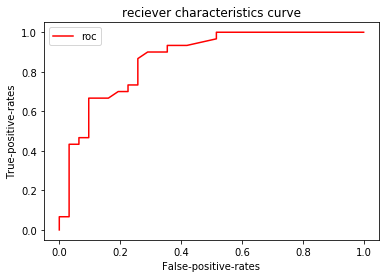

In [112]:
## plot an roc curve 

from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,preds_positive)
fpr

## let's under in a better way using auc curve 

def plot_curve(fpr,tpr):
    """
    plot a curve between false positive and true positive rates
    """
    plt.plot(fpr,tpr,color="red",label="roc")
    plt.xlabel("False-positive-rates")
    plt.ylabel("True-positive-rates")
    plt.legend()
    plt.title("reciever characteristics curve")
    
plot_curve(fpr,tpr)

In [118]:
## plot confusion matrix 

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_preds)
conf_mat

pd.crosstab(y_test,y_preds,rownames=["Actual label"],colnames=["Predicted label"])

Predicted label,0,1
Actual label,,
0,20,11
1,3,27


Text(33.0, 0.5, 'Predicted-label')

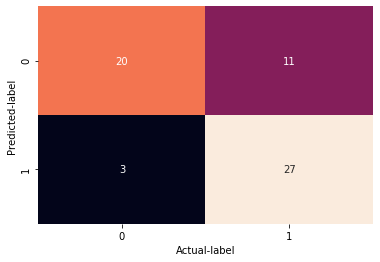

In [125]:
## plot the confusion matrix using seaborn's heatmap 

import seaborn as sns
fig,ax = plt.subplots()
ax = sns.heatmap(conf_mat,
                 annot=True,
                 cbar=False)
plt.xlabel("Actual-label")
plt.ylabel("Predicted-label")

In [141]:
## use different models 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = {"Logistic-regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random-forest":RandomForestClassifier()}

def fit_and_score(model,X_train,X_test,y_train,y_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
        return model_score
fit_and_score(model,X_train,X_test,y_train,y_test)

F:\Softwares\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic-regression': 0.8032786885245902}

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = {"Logistic-regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random-forest":RandomForestClassifier()}

def fit_and_score(model,X_train,X_test,y_train,y_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
        print(name,f":{model_score[name]*100:.2f}%")
    return model_score
fit_and_score(model,X_train,X_test,y_train,y_test)

F:\Softwares\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic-regression :80.33%
KNN :52.46%
Random-forest :78.69%


{'Logistic-regression': 0.8032786885245902,
 'KNN': 0.5245901639344263,
 'Random-forest': 0.7868852459016393}

In [177]:
## cross-val-score 
from sklearn.metrics import precision_score,f1_score
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(clf,X,y,cv=5,scoring=None)
cross_val_score
print(f"the cross-validated score is :{np.mean(cross_val_score)*100:.2f}")

the cross-validated score is :82.48


In [178]:
precision_score(y_test,y_preds)

0.7105263157894737

In [196]:
## tuning hyperparameters using Randomized Search Cv 

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV



grid = {"n_estimators":np.arange(2,10,2),
        "max_depth":np.arange(2,10,2),
        "min_samples_leaf":np.arange(2,10,2),
        "min_samples_split":np.arange(2,10,2),
        "max_features":["auto","sqrt"]
       }

rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10)
rs_clf.fit(X_train,y_train)

rs_clf.score(X_test,y_test)

0.7377049180327869